### Pendahuluan Studi Kasus

Dalam beberapa tahun terakhir, Pasar real estat merupakan salah satu sektor yang sangat dinamis dan kompleks, dengan harga rumah dipengaruhi oleh berbagai faktor. Salah satu tantangan utama dalam industri tersebut adalah memprediksi harga rumah, terutama karena banyaknya variabel yang dapat memengaruhi nilai properti, seperti lokasi, ukuran, dan fasilitas.

Dalam memecahkan masalah ini, saya menggunakan pendekatan sederhana yaitu metode regresi linear. Algoritma yang memungkinkan kita memahami hubungan antara berbagai faktor yang memengaruhi harga rumah, seperti luas tanah, jumlah kamar, dan jumlah garasi.

Contohnya:

- Jika rumah memiliki luas tanah yang lebih besar, kemungkinan besar harganya juga akan lebih tinggi.
- Rumah dengan lebih banyak kamar tidur cenderung dihargai lebih mahal.

Melalui studi kasus ini, saya menggunakan data dari rumah-rumah yang pernah dijual untuk melatih model prediksi. Model ini kemudian dapat digunakan untuk memprediksi harga rumah baru berdasarkan karakteristiknya. Misalnya, jika ada rumah dengan luas tanah 200 m², 3 kamar tidur, dan 2 kamar mandi, kita bisa memperkirakan harganya.

====

### Algoritma yang Dipakai

### Regresi Linear

Regresi linear adalah salah satu teknik yang paling umum digunakan dalam analisis statistik untuk memahami hubungan antara variabel dependen (y) dan satu atau lebih variabel independen (x). Model regresi linear dapat dinyatakan sebagai:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \epsilon$$

Di mana:
- $y$ adalah variabel dependen,
- $x_1, x_2, \ldots, x_n$ adalah variabel independen,
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_n$ adalah koefisien regresi,
- $\epsilon$ adalah kesalahan acak.

Tujuan dari regresi linear adalah untuk menemukan koefisien $\beta$ yang meminimalkan kesalahan kuadrat rata-rata antara nilai yang diamati dan nilai yang diprediksi oleh model.

===

#### Alasan menggunakan Algoritma
- Harga rumah sering kali memiliki hubungan linier dengan beberapa faktor seperti luas bangunan, jumlah kamar, dan lokasi. Regresi linier sangat baik untuk menangani hubungan linier yang jelas antara fitur dan target. Ketika hubungan antar fitur dan target cukup sederhana atau hampir linier, regresi linier memberikan hasil yang baik tanpa perlu model yang lebih kompleks.

- Regresi linier lebih cepat dan lebih ringan dibandingkan dengan model yang lebih kompleks seperti jaringan saraf atau model pohon keputusan (decision trees). Ini menjadikannya pilihan yang efisien jika waktu komputasi menjadi faktor penting. Algoritma regresi linier memiliki proses pelatihan yang sederhana dan dapat cepat mencapai hasil yang baik, meskipun pada dataset besar.

- Regresi linier memiliki interpretasi yang sederhana dan mudah dipahami. Setiap koefisien yang dihasilkan oleh model mengindikasikan pengaruh relatif dari setiap fitur terhadap harga rumah.

===

### Prinsip Kerja
1. Membagi Data menjadi Fitur dan Target
Fitur (X) dan target (y) dari data yang ada adalah sebagai berikut :
- X (Fitur)  : [Luas Bangunan (LB), Luas Tanah (LT), Jumlah Kamar Tidur (KT), Jumlah Kamar Mandi (KM), dan Jumlah Garasi (GRS)]
- y (Target) : [Harga Rumah]

2. Model Regresi Linier
Persamaan Regresi Linier:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n$$
Di mana:
- $y$ = Harga Rumah yang diprediksi,
- $x_1, x_2, \ldots, x_n$ = Fitur (LB, LT, KT, KM, GRS),
- $\beta_0, \beta_1, \beta_2, \ldots, \beta_n$ = Koefisien yang dihitung oleh model.

3. Penghitungan MAE, MSE, dan R-Squared

a. Mean Absolute Error (MAE): MAE mengukur rata-rata dari selisih absolut antara harga yang diprediksi dan harga yang sebenarnya.
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y}_i \rvert$$
Di mana:
- $y_i$ = Harga rumah sebenarnya
- $\hat{y}_i$ = Harga yang diprediksi

b. Mean Squared Error (MSE): MSE mengukur rata-rata dari kuadrat selisih antara harga yang diprediksi dan harga yang sebenarnya.
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

c. R-squared (R²): R-squared mengukur seberapa baik model menjelaskan variansi data. Nilai $R^2$ mendekati 1 menunjukkan model yang sangat baik dalam menjelaskan variansi target.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
Di mana:
$\bar{y}$ = rata-rata dari harga sebenarnya

===


## Import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_excel(r"D:\Pemrograman\proyek akhir sisdas\DATA RUMAH.xlsx")
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


Keterangan kolom:

- NAMA RUMAH: Deskripsi atau nama rumah.
- HARGA: Harga rumah (dalam rupiah).
- LB: Luas Bangunan (m²).
- LT: Luas Tanah (m²).
- KT: Jumlah Kamar Tidur.
- KM: Jumlah Kamar Mandi.
- GRS: Jumlah Garasi.

## Data Preprocessing

In [3]:
df.info()
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
Shape of data:
(1010, 8)


In [4]:
print("Jumlah data duplikat:", df.duplicated().sum(), end="")
df.isna().sum()


Jumlah data duplikat: 0

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [5]:
df = df.rename(columns={
    'NO': 'nomor',
    'NAMA RUMAH': 'nama_rumah',
    'HARGA': 'harga',
    'LB': 'lb',
    'LT': 'lt',
    'KT': 'kt',
    'KM': 'km',
    'GRS': 'grs'
})
df

,nomor,nama_rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [6]:
#Mengganti satuan harga agar lebih readable
df['harga'] = (df['harga']/1000000).astype(int)
df.drop(columns=['nomor'], inplace=True)
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3


In [7]:
q1 = df['harga'].quantile(0.25)
median = df['harga'].median()
q3 = df['harga'].quantile(0.75)

def classification_harga(harga):
    if harga <= q1:
        return 'Murah'
    elif harga <= median:
        return 'Menengah'
    else:
        return 'Mahal'

# Menambahkan kolom baru 'Klasifikasi Harga'
df['tingkat_harga'] = df['harga'].apply(classification_harga)

# Menampilkan DataFrame dengan kolom baru
df.head()

,nama_rumah,harga,lb,lt,kt,km,grs,tingkat_harga
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800,220,220,3,3,0,Menengah
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600,180,137,4,3,2,Menengah
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000,267,250,4,4,4,Murah
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430,40,25,2,2,0,Murah
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000,400,355,6,5,3,Mahal


In [8]:
df.describe()

,harga,lb,lt,kt,km,grs
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7628.982178,276.539604,237.432673,4.668317,3.607921,1.920792
std,7340.945285,177.864557,179.957604,1.572776,1.420066,1.510998
min,430.000000,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3262.500000,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5000.000000,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9000.000000,350.000000,290.000000,5.000000,4.000000,2.000000
max,65000.000000,1126.000000,1400.000000,10.000000,10.000000,10.000000


Dari fungsi `.describe()` di atas, kita dapat melihat beberapa statistik penting tentang kolom harga:

- **Harga Terendah**: 430 juta
- **Quartil 25% (Q1)**: 3.2 miliar
- **Median**: 5 miliar
- **Quartil 75% (Q3)**: 9 miliar
- **Harga Termahal**: 65 miliar

Selain itu, kita juga dapat mengamati bahwa semua kolom atau data yang digunakan, kecuali kolom nama_rumah, memiliki korelasi yang positif dengan harga.


## Eksplorasi Data

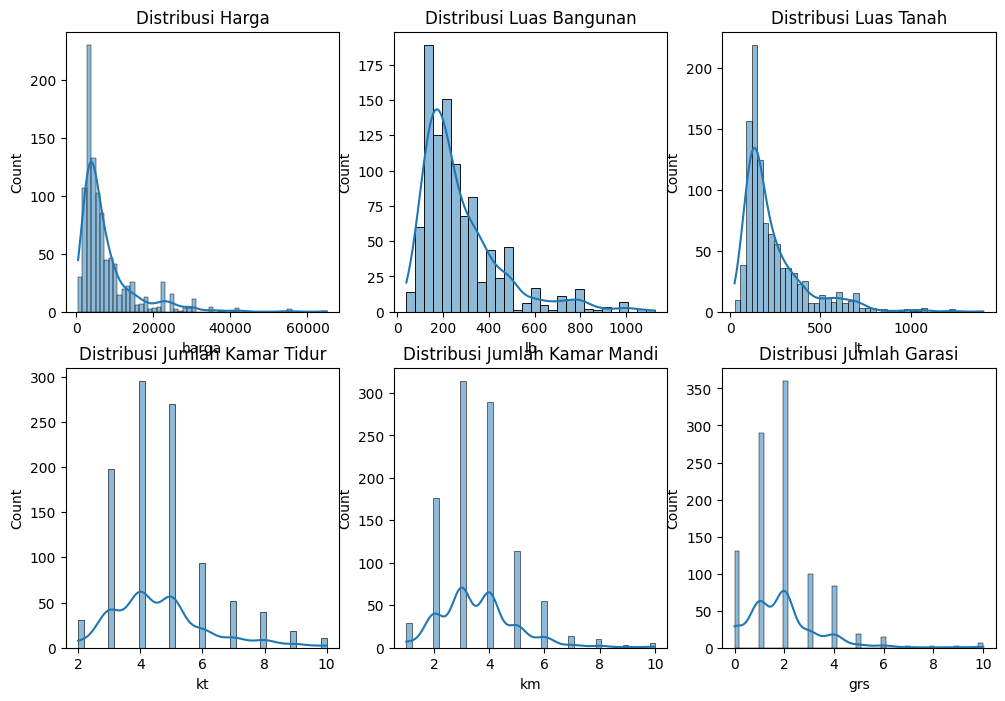

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['harga'], kde=True)
plt.title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['lb'], kde=True)
plt.title('Distribusi Luas Bangunan')

plt.subplot(2, 3, 3)
sns.histplot(df['lt'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kt'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['km'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['grs'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.show()

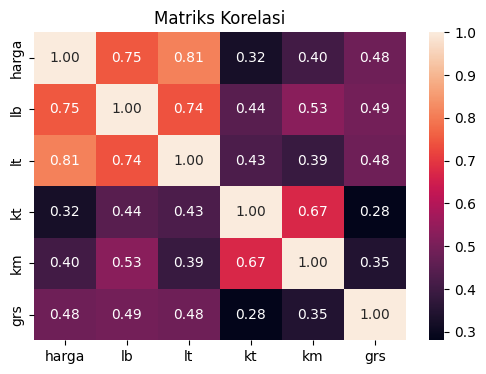

In [10]:
# Menghapus kolom 'tingkat_harga' dan 'daerah'
df_corr = df.drop(['tingkat_harga','nama_rumah'], axis=1)

# Menghitung matriks korelasi
correlation_all = df_corr.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_all, annot=True, cmap='rocket', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

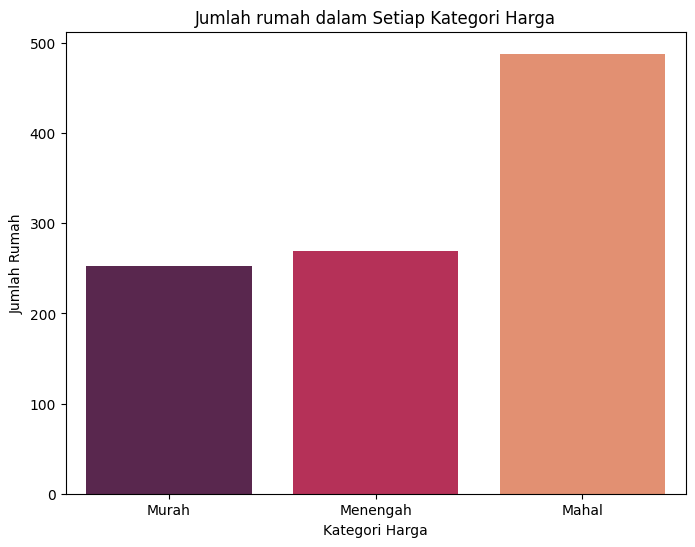

tingkat_harga
Mahal       488
Menengah    269
Murah       253
Name: count, dtype: int64

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tingkat_harga', order=['Murah', 'Menengah', 'Mahal'], palette='rocket')
plt.title('Jumlah rumah dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

df['tingkat_harga'].value_counts()

## Pemodelan dan Evaluasi
### Persiapan Data untuk Pemodelan

In [12]:
X = df[['lb','lt','kt','km','grs']].values #Feature
y = df['harga'].values #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Regresi Linear

In [13]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung MAE, MSE, dan R2 Score untuk data pelatihan
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Menghitung MAE, MSE, dan R2 Score untuk data pengujian
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model pada Data Pelatihan:")
print(f'MAE: {mae_train}')
print(f'MSE: {mse_train}')
print(f'R2 Score: {r2_train}')
print("\nEvaluasi Model pada Data Pengujian:")
print(f'MAE: {mae_test}')
print(f'MSE: {mse_test}')
print(f'R2 Score: {r2_test}')

Evaluasi Model pada Data Pelatihan:
MAE: 2117.447345227117
MSE: 16455644.894573443
R2 Score: 0.7040692928048742

Evaluasi Model pada Data Pengujian:
MAE: 1980.3555183722153
MSE: 10675731.022166727
R2 Score: 0.771313252678845


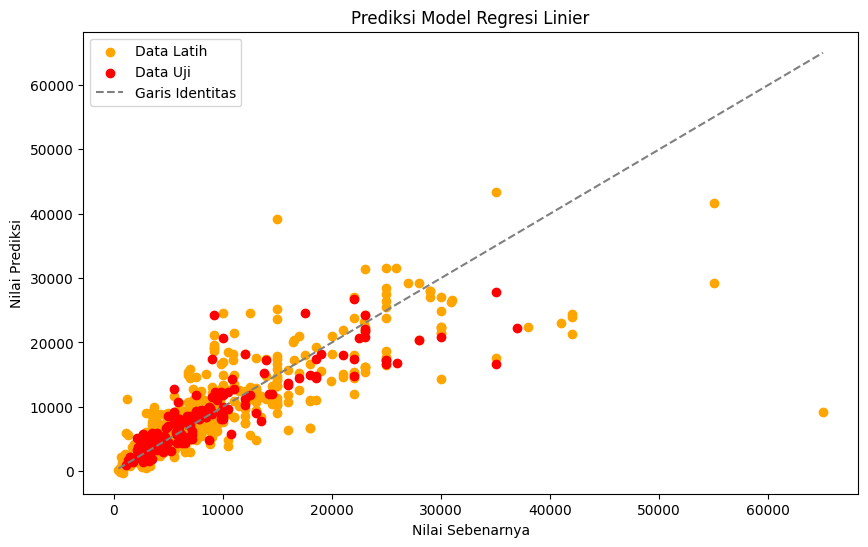

In [14]:
# Visualisasi regresi untuk data latih dan data uji
plt.figure(figsize=(10, 6))

# Plot data latih
plt.scatter(y_train, y_train_pred, color='orange', label='Data Latih')

# Plot data uji
plt.scatter(y_test, y_pred, color='red', label='Data Uji')

# Plot garis identitas
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', label='Garis Identitas')

# Label sumbu x dan y
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')

# Judul plot
plt.title('Prediksi Model Regresi Linier')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Definisikan fungsi untuk memprediksi harga berdasarkan fitur yang dipilih
def predict_house_price(lb, lt, kt, km, grs):
    # Lakukan prediksi harga menggunakan model regresi linier
    predicted_price = model.predict([[lb, lt, kt, km, grs]])

    # Tampilkan hasil prediksi
    print("Harga rumah impian anda diperkirakan sekitar IDR {:,.3f} juta".format(predicted_price[0]))

# Buat slider untuk setiap fitur
slider_lb = widgets.FloatSlider(value=100, min=df['lb'].min(), max=df['lb'].max(), step=10, description='LB:')
slider_lt = widgets.FloatSlider(value=300, min=20, max=df['lt'].max(), step=10, description='LT:')
slider_kt = widgets.FloatSlider(value=3, min=1, max=df['kt'].max(), step=1, description='KT:')
slider_km = widgets.FloatSlider(value=2, min=1, max=df['km'].max(), step=1, description='KM:')
slider_grs = widgets.FloatSlider(value=2, min=1, max=df['grs'].max(), step=1, description='GRS:')

# Buat tampilan interaktif
widgets.interactive(predict_house_price, lb=slider_lb, lt=slider_lt, kt=slider_kt, km=slider_km, grs=slider_grs)


interactive(children=(FloatSlider(value=100.0, description='LB:', max=1126.0, min=40.0, step=10.0), FloatSlide…

###